# Modeling

In [596]:
# Import packages

# Data Cleaning
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans #For KMeans
from sklearn.cluster import AgglomerativeClustering #hierarchy
import scipy.cluster.hierarchy as sch #hierarchy
from sklearn.cluster import DBSCAN #DBSCAN
%matplotlib inline

# Dimensionality Reduction
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Feature Engineering
Completed by Annie, created several new features based off data from original starting features, which were collected from various API's and JSON datasets.

In [597]:
# Load dataset
nyc = pd.read_csv('clean_data/nyc_neighbourhoods_data.csv')
nyc.head()

,Borough,Neighbourhood,Latitude,Longitude,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),Restaurant_Mean_Reviews,...,Rat_Mean_Created Month,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day
0,Bronx,Kingsbridge and Riverdale,40.880678,-73.906540,172,120,143,152,605.036075,326.358333,...,6.529010,16.351536,2017.939623,6.803774,16.181132,11.818868,9.0,9.0,7.222222,9.777778
1,Bronx,Northeast Bronx,40.890964,-73.846239,272,188,214,218,662.458949,324.000000,...,6.792683,16.121951,2016.590551,7.020997,16.207349,10.007874,NaN,NaN,NaN,NaN
2,Bronx,Crotona and Tremont,40.852820,-73.912310,153,92,96,111,584.790846,242.891304,...,6.483301,15.623772,2016.841270,6.684656,15.157672,10.455026,1.0,1.0,7.000000,27.000000
3,Bronx,Bronx Park and Fordham,40.862529,-73.888159,254,170,199,219,611.026337,291.141176,...,6.414469,15.318764,2016.574657,6.631961,15.424536,9.045198,2.0,2.0,8.000000,14.000000
4,Bronx,Pelham and Throgs Neck,40.847394,-73.840583,486,342,404,408,603.547595,420.081871,...,6.762058,15.802787,2017.194790,6.930917,15.725934,8.972820,NaN,NaN,NaN,NaN


In [598]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       42 non-null     object 
 1   Neighbourhood                 42 non-null     object 
 2   Latitude                      42 non-null     float64
 3   Longitude                     42 non-null     float64
 4   Restaurant_Count_Name         42 non-null     int64  
 5   Restaurant_Count_Reviews      42 non-null     int64  
 6   Restaurant_Count_Rating       42 non-null     int64  
 7   Restaurant_Count_Price        42 non-null     int64  
 8   Restaurant_Mean_Distance (m)  42 non-null     float64
 9   Restaurant_Mean_Reviews       42 non-null     float64
 10  Restaurant_Mean_Rating        42 non-null     float64
 11  Restaurant_Mean_Price         42 non-null     float64
 12  Restaurant_Sum_Reviews        42 non-null     float64
 13  Restaur

## Dimensionality Reduction

#### Preparation

In [599]:
# Encode categorical (ordinal) features for use in dimensionality reduction
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_Labels = gle.fit_transform(nyc['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
nyc['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(nyc['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
nyc['Neighbourhood_Label'] = Neighbourhood_Labels

In [600]:
# Scale all feautures for PCA computation
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

nyc_test = nyc[['Latitude', 'Longitude',
       'Restaurant_Count_Name', 'Restaurant_Count_Reviews',
       'Restaurant_Count_Rating', 'Restaurant_Count_Price',
       'Restaurant_Mean_Distance (m)', 'Restaurant_Mean_Reviews',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'Restaurant_Sum_Rating',
       'Restaurant_Sum_Price', 'School_Count_Name', 'School_Mean_Reviews',
       'School_Mean_Rating', 'School_Sum_Reviews', 'School_Sum_Rating',
       'School_Sum_Price', 'Park_Count_Name', 'Park_Mean_Reviews',
       'Park_Mean_Rating', 'Park_Sum_Reviews', 'Park_Sum_Rating',
       'Transit_Count_Name', 'Transit_Mean_Reviews', 'Transit_Mean_Rating',
       'Transit_Sum_Reviews', 'Transit_Sum_Rating', 'Grocery_Count_Name',
       'Grocery_Mean_Reviews', 'Grocery_Mean_Rating', 'Grocery_Sum_Reviews',
       'Grocery_Sum_Rating', 'Rat_Sum_Case Open?',
       'Rat_Sum_Days Complaint Open', 'Rat_Count_Created Date',
       'Rat_Count_Closed Date', 'Rat_Mean_Case Open?', 'Rat_Mean_Created Year',
       'Rat_Mean_Created Month', 'Rat_Mean_Created Day',
       'Rat_Mean_Closed Year', 'Rat_Mean_Closed Month', 'Rat_Mean_Closed Day',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Count_Ride Count', 'Uber_Mean_Month', 'Uber_Mean_Day',
       'Borough_Label', 'Neighbourhood_Label']]

nyc_scaled = pd.DataFrame(n_scaler.fit_transform(nyc_test), columns=nyc_test.columns)

In [601]:
nyc_scaled.head()

,Latitude,Longitude,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),Restaurant_Mean_Reviews,Restaurant_Mean_Rating,Restaurant_Mean_Price,...,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day,Borough_Label,Neighbourhood_Label
0,0.967775,0.570608,0.274827,0.267327,0.233333,0.275204,0.162818,0.096404,0.288842,0.270744,...,0.719085,0.360825,0.341631,0.754623,0.001813,0.001813,0.805556,0.000000,0.0,0.463415
1,1.000000,0.703352,0.505774,0.491749,0.415385,0.455041,0.219422,0.095173,0.051407,0.071387,...,0.266932,0.728094,0.349866,0.715981,NaN,NaN,NaN,NaN,0.0,0.585366
2,0.880500,0.557907,0.230947,0.174917,0.112821,0.163488,0.142861,0.052827,0.164141,0.000000,...,0.350962,0.159428,0.020122,0.725522,0.000000,0.000000,0.750000,1.000000,0.0,0.195122
3,0.910917,0.611071,0.464203,0.432343,0.376923,0.457766,0.168723,0.078018,0.384207,0.091703,...,0.261605,0.070334,0.103954,0.695440,0.000227,0.000227,1.000000,0.245161,0.0,0.024390
4,0.863501,0.715803,1.000000,1.000000,0.902564,0.972752,0.161350,0.145335,0.271352,0.274960,...,0.469448,0.575792,0.198635,0.693896,NaN,NaN,NaN,NaN,0.0,0.658537


### Feature Selection (Filter Method)

In [602]:
# Before doing any transformations we will extract our target variable to keep it as it is
y = nyc_scaled.Borough_Label
nyc_scaled.drop('Borough_Label',axis=1, inplace=True)

In [603]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.04)
df_transformed = vt.fit_transform(nyc_scaled)

# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = nyc_scaled.columns[vt.get_support()]

# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = nyc_scaled.columns[vt.get_support()]

# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

df_corr = df_transformed.corr().abs()

indices = np.where(df_corr > 0.5) 
indices = [(df_corr.index[x], df_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# Loop to create pairs from each column that passes the variance threshold and correlation criteria
for idx in indices: 
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

print(len(indices))

91


In [604]:
from sklearn.feature_selection import f_regression, SelectKBest

# Select most suitable features from pairs 
skb = SelectKBest(f_regression, k=10)
X = skb.fit_transform(df_transformed, y)

# Give the position of the top k features
skb.get_support()

# Format arrays to DataFrame
df_transformed.columns[skb.get_support()]
X = pd.DataFrame(X,columns=df_transformed.columns[skb.get_support()])
X.head()

,Latitude,Longitude,Restaurant_Count_Name,Restaurant_Mean_Reviews,School_Sum_Price,Rat_Mean_Case Open?,Rat_Mean_Created Year,Rat_Mean_Created Month,Rat_Mean_Created Day,Neighbourhood_Label
0,0.967775,0.570608,0.274827,0.096404,0.0,0.471205,0.778546,0.174351,0.829974,0.463415
1,1.000000,0.703352,0.505774,0.095173,0.0,0.186352,0.229740,0.575704,0.709608,0.585366
2,0.880500,0.557907,0.230947,0.052827,0.0,0.275466,0.318984,0.104773,0.448423,0.195122
3,0.910917,0.611071,0.464203,0.078018,0.0,0.179809,0.221685,0.000000,0.288514,0.024390
4,0.863501,0.715803,1.000000,0.145335,0.0,0.089145,0.465976,0.529087,0.542277,0.658537


### Feature Selection (Correlation Heat Map)

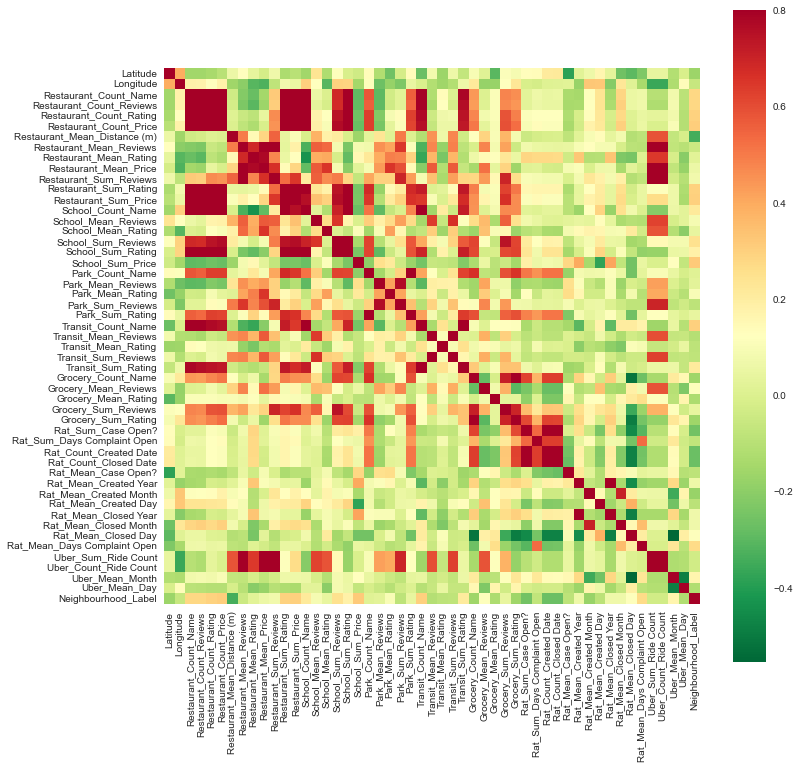

In [605]:
cormat = nyc_scaled.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cormat, vmax=.8, square=True, cmap="RdYlGn_r");

In [606]:
# Most correlated features with Borough
corrmat = nyc_scaled.corr()
top_corr_features = corrmat.index[abs(corrmat['Borough_Label'])>0.25]
plt.figure(figsize=(10,10))
g = sns.heatmap(nyc[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

KeyError: 'Borough_Label'

### Principal Component Analysis (PCA)

In [ ]:
# PCA cannot have null value
nyc_scaled.isnull().sum()

# 1. Fill null values - potentially skews dataset
nyc_scaled.fillna(0, inplace=True)

# 2. Drop null values - removes 9/42 rows of data (significant)
# nyc_scaled.dropna()

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [52] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [14] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [52] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[14]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


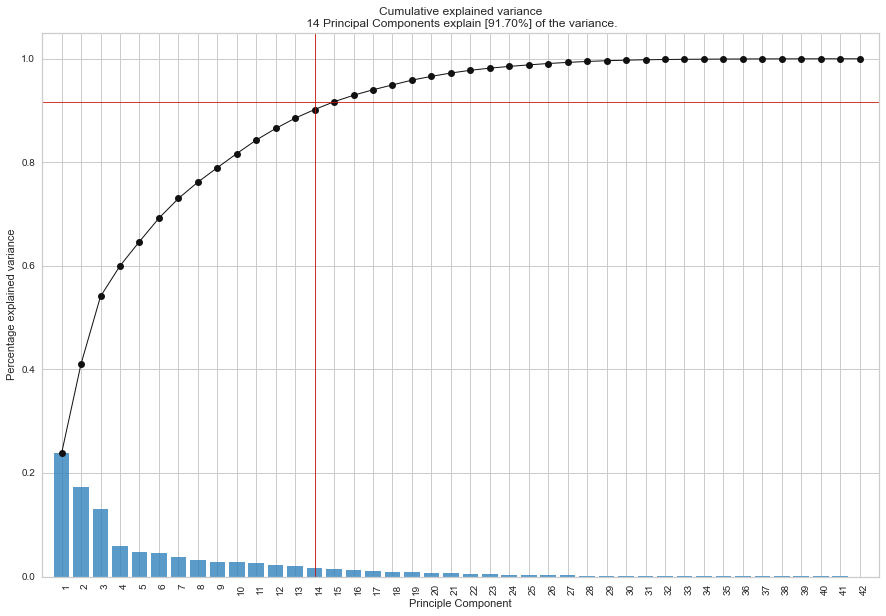

,PC,feature,loading,type
0,PC1,Restaurant_Sum_Rating,0.267143,best
1,PC2,Restaurant_Mean_Reviews,0.300308,best
2,PC3,Rat_Count_Created Date,0.302781,best
3,PC4,School_Sum_Price,0.313830,best
4,PC5,Rat_Sum_Days Complaint Open,0.388628,best
5,PC6,Rat_Mean_Closed Month,0.500264,best
6,PC7,Transit_Mean_Rating,0.401683,best
7,PC8,Rat_Mean_Days Complaint Open,-0.454198,best
8,PC9,Park_Mean_Reviews,0.314028,best
9,PC10,Uber_Mean_Day,0.437252,best


<Figure size 864x576 with 0 Axes>

In [ ]:
from pca import pca

# Initialize with normalization
model = pca(normalize=True, n_components=.90) #n_components -> Set to None if you wanna keep all

# Fit scaled DataFrame
results = model.fit_transform(nyc_scaled) 
# results = model.fit_transform(X, col_labels=labels, row_labels=y) # Array

# Scree plot with explained variance
model.plot()

# Top performing features
model.results['topfeat']

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [42] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [42] unique colors! Available unique colors: [9].


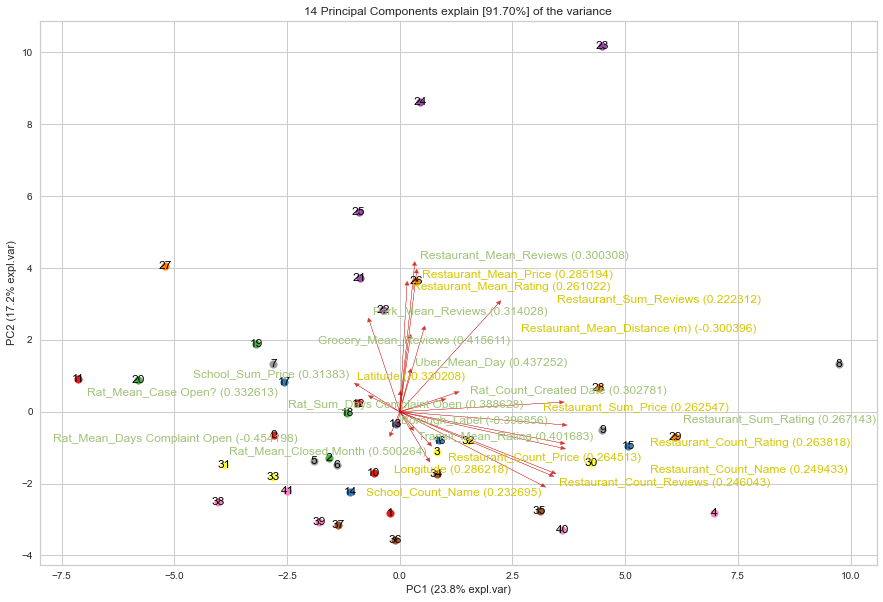

In [ ]:
# Model PCA using 2D biplot
model.biplot(y=None, legend=False);

In [ ]:
# Create a DataFrame of the top PCA components
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [ ]:
# Create new DataFrame with top PCA components
pca_scaled = apply_pca(nyc_scaled, 14)
pca_scaled.head()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14
0,-0.620485,-0.066639,-0.212365,-0.241793,-0.533089,-0.431730,0.204880,0.416754,-0.304052,-0.453855,0.190031,-0.181500,-0.378993,-0.153289
1,0.053231,-0.776442,0.003363,-0.835834,-0.235515,-0.243179,-0.044002,0.614857,0.107039,-0.137856,0.063428,-0.219643,0.156544,-0.135129
2,-0.384579,0.048648,-1.180685,-0.463462,-0.347592,0.033251,0.112825,-0.287739,0.271582,-0.085164,-0.283167,-0.082921,0.203575,0.050700
3,0.170521,0.130428,-0.975359,-0.421287,-0.526126,0.292557,0.024510,-0.030220,0.258555,-0.129654,0.020040,0.028826,-0.289734,0.007692
4,1.619938,-0.609725,-0.017251,-0.278722,-0.211698,0.186958,-0.066545,0.766073,-0.182927,-0.175020,-0.348183,0.167447,0.143408,0.014171


## Modeling

#### Preparation

In [ ]:
# Set up the clustering models

# Cluster for all features, based on top principal components
X = pca_scaled

# K-Means
km = KMeans(n_clusters=4, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=5)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [ ]:
# Create function to plot clusters
def plot_clusters(X,y_res, x_label="X-axis", y_label="Y-axis", plt_cluster_centers=True):
    
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')

    plt.rcParams["figure.figsize"]=(12,10) 
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

In [ ]:
def scatter(X, y_res, plt_cluster_centers=False):

    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    c='black',
                    s=50,
                    marker='s',
                    )

    plt.rcParams["figure.figsize"]=(12,8) 
    plt.grid()
    plt.show()

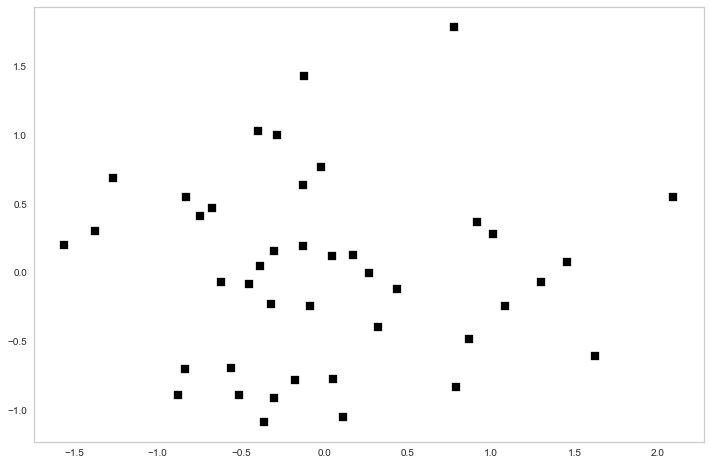

In [ ]:
# Create scatter plot without clusters
scatter(np.array(pca_scaled), y_km);

#### K-Means Clustering

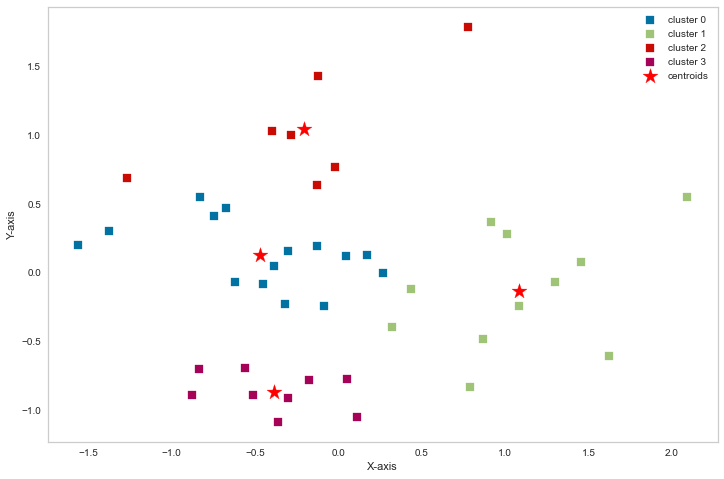

In [ ]:
# K-Means Cluster
plot_clusters(np.array(pca_scaled), y_km)

#### Hierarchical Cluster

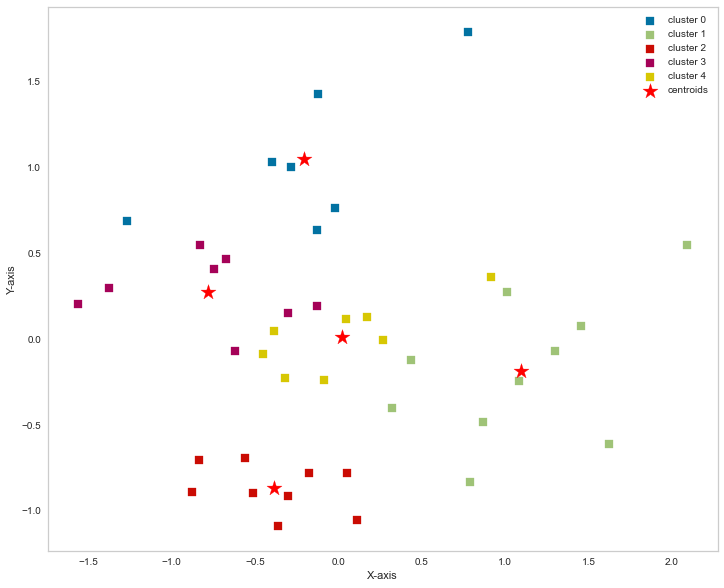

In [ ]:
# Hierarchical Cluster
plot_clusters(np.array(X), y_ac)

#### DBSCAN Cluster

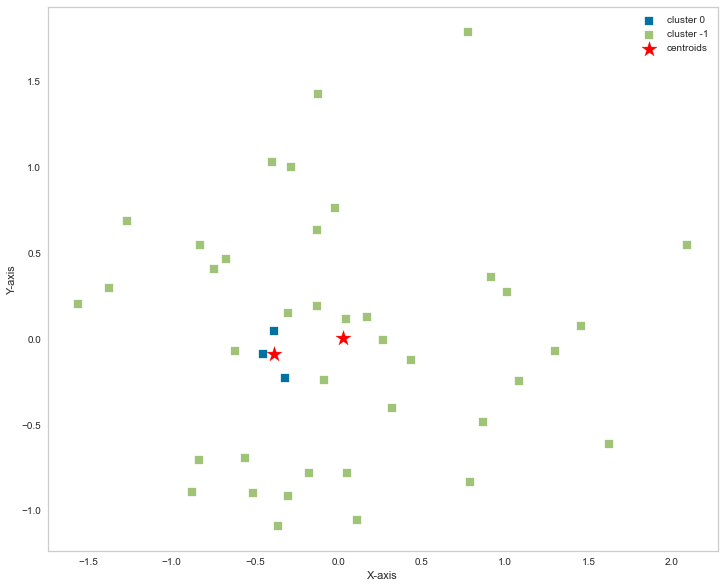

In [ ]:
# DBSCAN Cluster
plot_clusters(np.array(X), y_db)

## Model Evaluation

* To evaluate our k-means models, we can use inertia, aka an elbow plot to help choose the optimal number of clusters

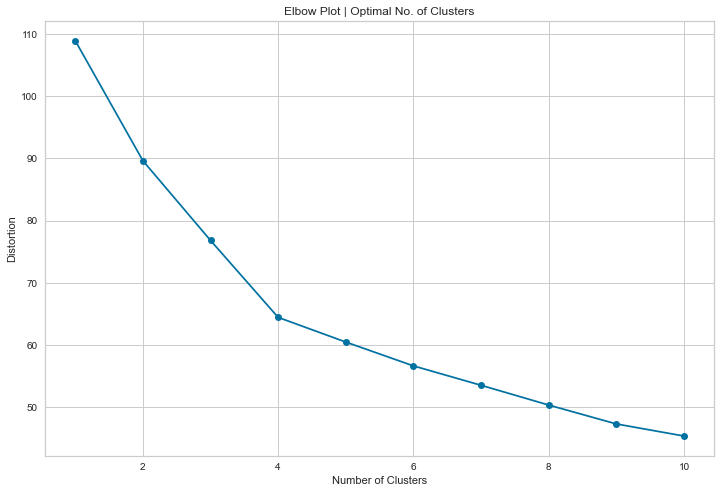

In [ ]:
# Create elbow plot
X = nyc_scaled

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.rcParams["figure.figsize"] = (12,8) 
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Plot | Optimal No. of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

K = 4

* To evaluate our hierarchical model, we can use a dendrogram to help choose the optimal number of clusters

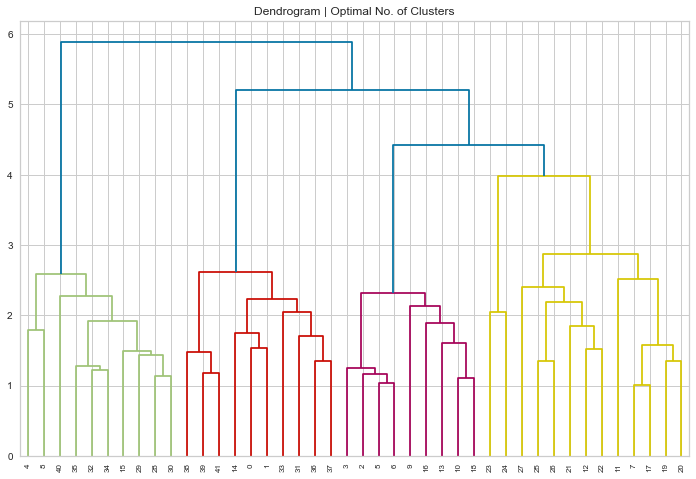

In [ ]:
# Create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

Clusters = 5

* To further evaluate our k-means models, we can visualize the optimal amount of clusters with a [silhoutte plot and score](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

In [ ]:
from sklearn import metrics
# Calculate silhoutte score of k-means clustering
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print score to 3 decimal places
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.076


The value of the silhouette score varies from -1 to 1. 
* \>0 to 1 indicates that the clusters are dense and well-separated
* 0 represents overlapping clusters with samples very close to the decision boundary of neighboring clusters.
* -1 to 0 indicates that samples may have been assigned to the wrong clusters

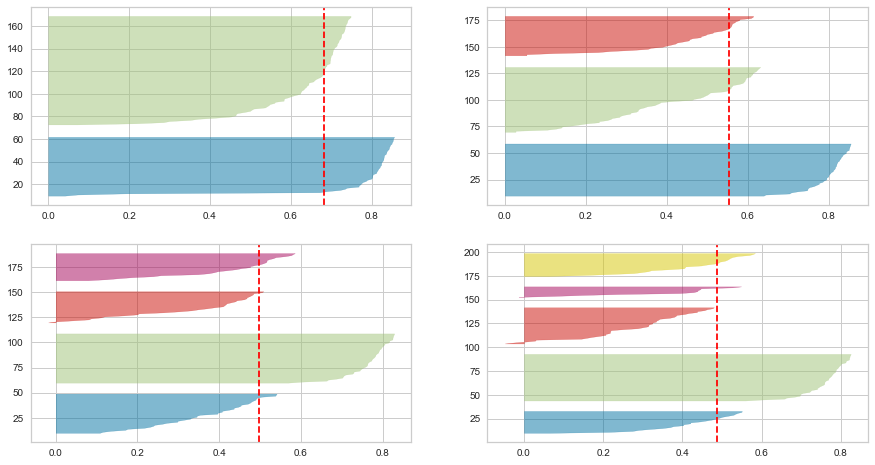

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Create silhoutte plots to visualize the effectiveness of varying number of clusters (2, 3, 4, and 5)
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100)
    q, mod = divmod(i, 2)
  
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Based on the analysis of the silhoutte plots:
* 5 clusters is suboptimal as the some clusters do not or barely make it over the average silhoutte score
* 4 clusters, look to be a slight improvement over 5, with cluster widths starting to widen, and all clusters being over the average silhoutte score
* 2 and 3 clusters look optimal, with 3 being the most optimal, as all clusters are over the average score, and have a more uniform thickness, representing more equal cluster distribution